In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Generate random traffic accident data
def generate_traffic_accident_data(num_accidents):
    data = []
    road_conditions = ['Dry', 'Wet', 'Snowy', 'Icy']
    weather_conditions = ['Clear', 'Rainy', 'Snowy', 'Foggy']
    severities = ['Minor', 'Major', 'Fatal']

    for i in range(num_accidents):
        accident_id = i + 1
        date_time = datetime.now() - timedelta(days=random.randint(0, 365), hours=random.randint(0, 23), minutes=random.randint(0, 59))
        latitude = round(random.uniform(-90, 90), 6)
        longitude = round(random.uniform(-180, 180), 6)
        road_condition = random.choice(road_conditions)
        weather = random.choice(weather_conditions)
        severity = random.choice(severities)
        num_vehicles = random.randint(1, 10)
        num_injuries = random.randint(0, 20)
        num_fatalities = random.randint(0, 5) if severity == 'Fatal' else 0

        data.append([accident_id, date_time, latitude, longitude, road_condition, weather, severity, num_vehicles, num_injuries, num_fatalities])

    return pd.DataFrame(data, columns=['Accident ID', 'DateTime', 'Latitude', 'Longitude', 'Road Condition', 'Weather', 'Severity', 'Number of Vehicles', 'Number of Injuries', 'Number of Fatalities'])

# Generate 100 synthetic traffic accidents
df_accidents = generate_traffic_accident_data(100)
print(df_accidents.head())


   Accident ID                   DateTime   Latitude   Longitude  \
0            1 2024-06-06 11:08:05.584425  75.370062  -73.737786   
1            2 2023-09-28 04:18:05.584505 -57.365374  -27.335426   
2            3 2024-08-13 03:10:05.584542  71.134087   96.853819   
3            4 2024-01-02 02:10:05.584565 -83.109098  112.654586   
4            5 2024-02-04 09:52:05.584599 -84.593462  126.134964   

  Road Condition Weather Severity  Number of Vehicles  Number of Injuries  \
0            Dry   Foggy    Major                   1                   0   
1            Icy   Clear    Major                   5                  12   
2            Wet   Snowy    Fatal                   9                   1   
3            Icy   Rainy    Minor                   7                  19   
4            Wet   Foggy    Minor                   4                  16   

   Number of Fatalities  
0                     0  
1                     0  
2                     0  
3                     0 

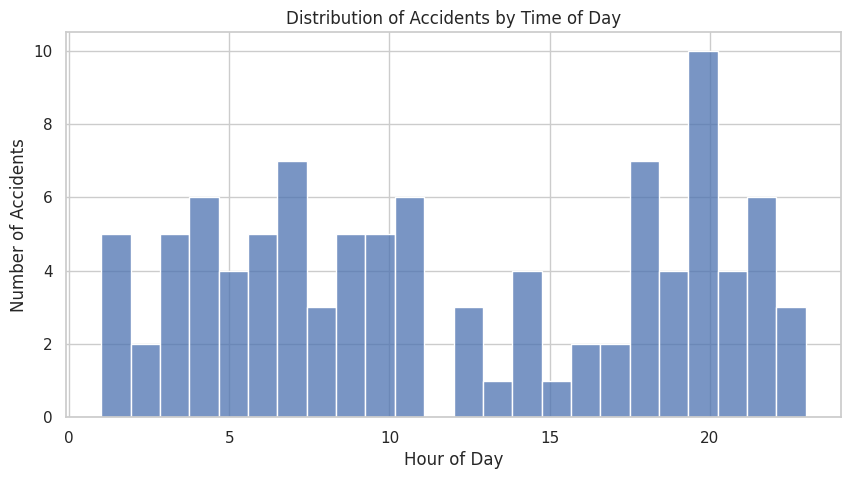

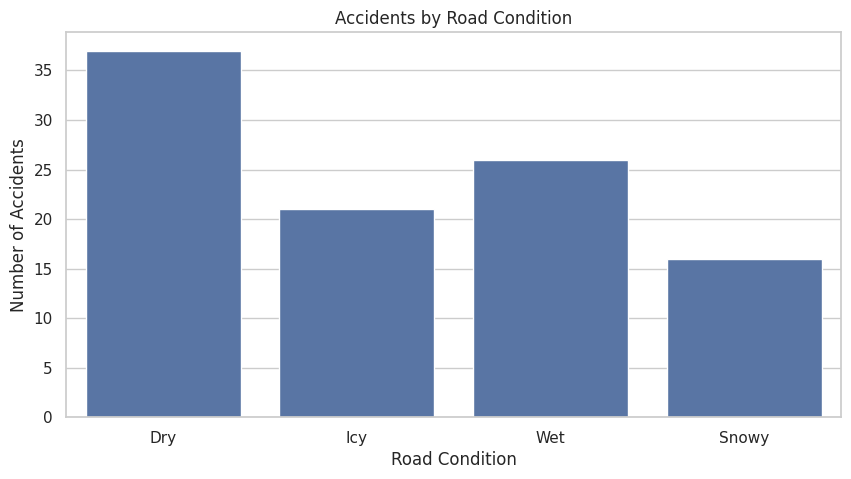

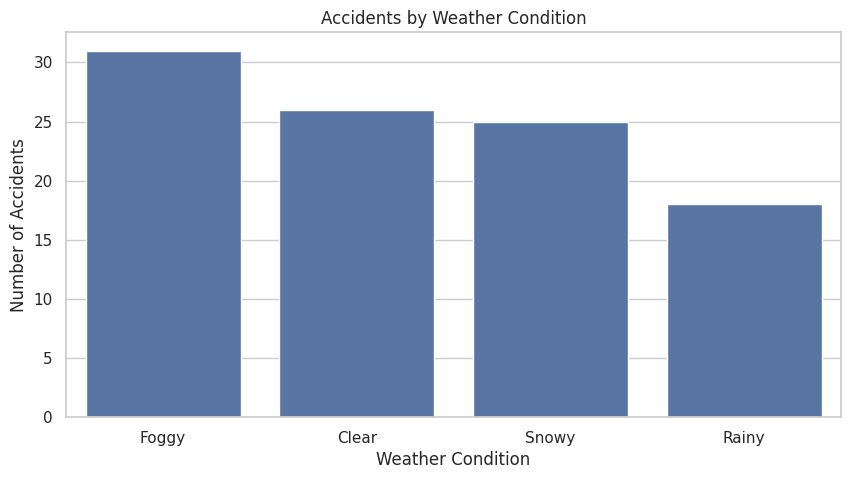

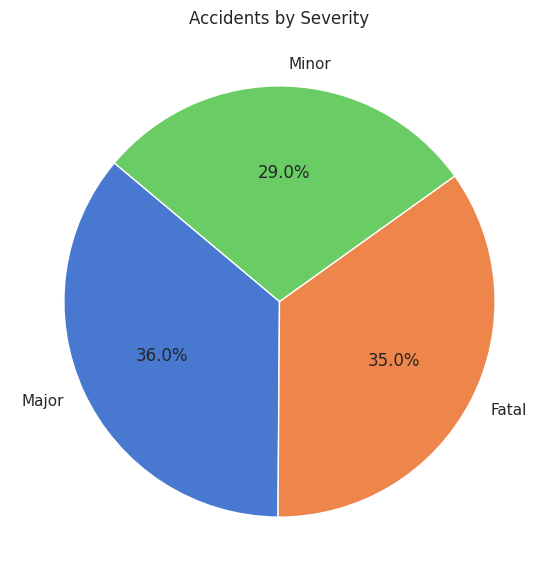

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Set up the visual style
sns.set(style="whitegrid")

# Heatmap of Accident Hotspots
m = folium.Map(location=[0, 0], zoom_start=2)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_accidents.iterrows()]
HeatMap(heat_data).add_to(m)
m.save("accident_hotspots.html")

# Distribution of Accidents by Time of Day
df_accidents['Hour'] = df_accidents['DateTime'].dt.hour
plt.figure(figsize=(10, 5))
sns.histplot(df_accidents['Hour'], bins=24, kde=False)
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by Road Condition
plt.figure(figsize=(10, 5))
sns.countplot(data=df_accidents, x='Road Condition')
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by Weather Condition
plt.figure(figsize=(10, 5))
sns.countplot(data=df_accidents, x='Weather')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by Severity
plt.figure(figsize=(7, 7))
df_accidents['Severity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Accidents by Severity')
plt.ylabel('')
plt.show()

